In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Práctica 1. Búsqueda heurística
Alumno: Rafael Misó.






## Funcionamiento del Algoritmo A*

En primer lugar, vamos a explicar como funciona el algoritmo A* a partir del pseudocódigo dado en el enunciado de la práctica, seguidamente, resolveremos un pequeño problema con el algoritmo A* que he implementado para la práctica.





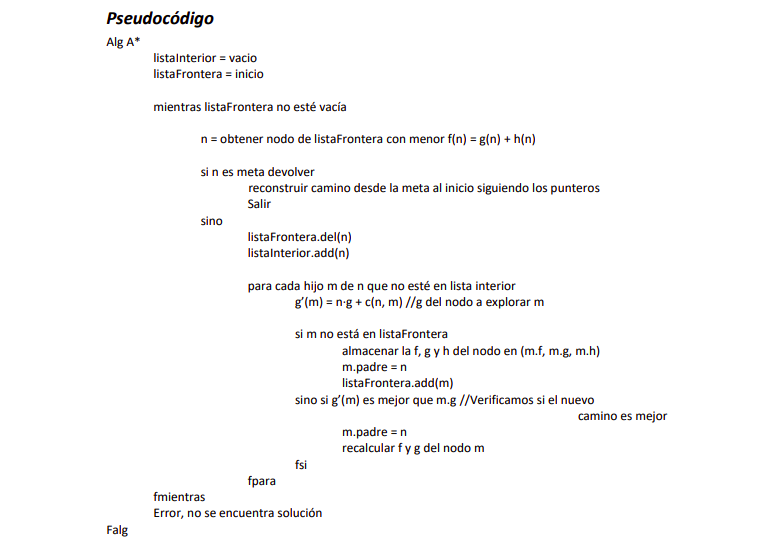

In [ ]:
#@title Pseudocódigo A*
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/pseudoA*.png")

En primer lugar, tenemos dos listas **listaInterior** y **listaFrontera**. En la primera iteración del algoritmo, en **listaFrontera** tenemos el nodo origen. A continuación, iteramos mientras que **listaFrontera** no este vacía (si se obtiene que **listaFrontera** es vacía, significa que no se ha encontrado una solución). Ahora, se escoge en **listaFrontera** el nodo con menor valor de f.

Seguidamente, se comprueba si el nodo escogido de **listaFrontera** corresponde con la posición destino, si es así, reconstruimos el camino mediante los punteros del nodo padre hasta llegar al origen. Si en cambio, el nodo escogido no corresponde con la posición destino, se elimina el nodo de **listaFrontera** y se añade a **listaInterior**. A continuación, se obtienen los hijos de este nodo que hemos escogido y para todos aquellos hijos que no estén **listaInterior** sumamos el coste de su desplazamiento más la g del nodo padre y se hace la siguiente comprobación, si el nodo hijo no está en **listaFrontera** entonces, asignamos los valores **f, g y h** del nodo y lo metemos en **listaFrontera**. En caso contrario, si el nodo hijo ya estaba en **listaFrontera**, comprobamos si el nuevo camino es mejor y actualizamos su valores.



### Traza de un pequeño problema

El problema que vamos a resolver es el siguiente.


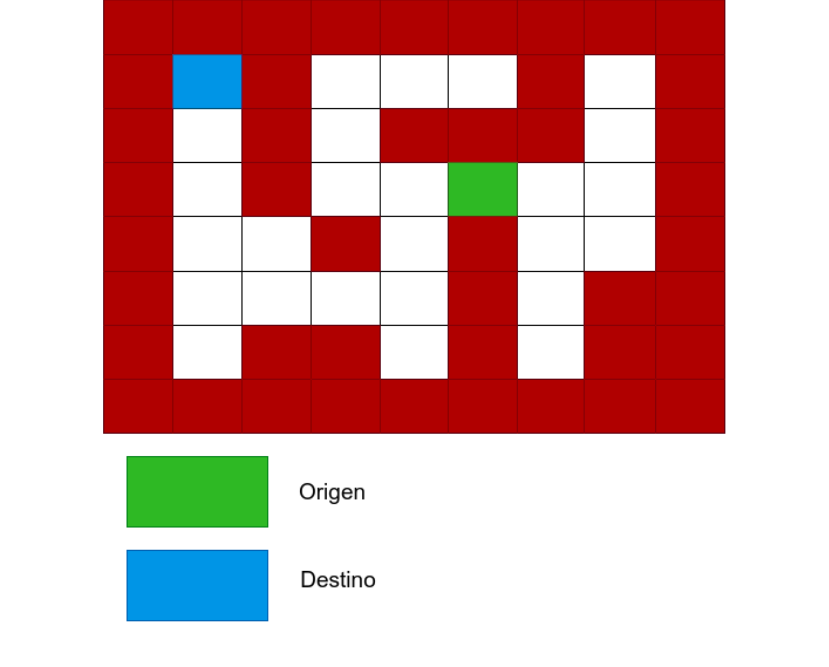

In [ ]:
#@title Problema a Resolver
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/problemaAResolver.png")

Este es el mapa 3 de la práctica, la heurística que vamos a implementar para seguir esta traza es la de Manhattan.

#### Iteración 1

En primer lugar, vamos a calcular el valor de h que lo obtendremos de calcular la distancia Manhattan de las casillas origen y destino, seguidamente crearemos el nodo destino.

In [ ]:
nodoInicial = Nodo(None, origen, 0, h)

El primer atributo, es el padre, el segundo es la casilla, el tercero el valor de g y el último la h.

A continuación, inserto la clase Nodo que he creado para poder hacer la práctica.

In [ ]:
class Nodo():
    def __init__(self, padre, casilla, g, h):
        self.padre = padre
        self.casilla = casilla
        self.g = g
        self.h = h
        self.f = self.g + self.h

    def getPadre (self):
        return self.padre

    def getCasilla (self):
        return self.casilla

    def getG (self):
        return self.g

    def getH (self):
        return self.h

    def getF (self):
        return self.f

    def setPadre(self, nodo):
        self.padre = nodo

    def setG(self, g):
        self.g = g

    def setF(self, f):
        self.f = f

    def setH(self, h):
        self.h = h

Una vez creado el nodo origen, lo insertamos en **listaFrontera** y como no hay más nodos dentro de esta lista, asumimos que es el mejor nodo que hay por lo que, lo quitamos de **listaFrontera** y lo añadimos a **listaInterior** ya que el nodo ha sido evaluado.

A continuación, comprobamos que la casilla origen no sea igual a la casilla destino y como no lo es, llamamos a la función **adyacentes**

In [ ]:
def adyacentes (casilla):
    adya = []
    adya.append(Casilla(casilla.getFila() - 1,casilla.getCol()))
    adya.append(Casilla(casilla.getFila() - 1, casilla.getCol() + 1))
    adya.append(Casilla(casilla.getFila(), casilla.getCol() + 1))
    adya.append(Casilla(casilla.getFila() + 1, casilla.getCol() + 1))
    adya.append(Casilla(casilla.getFila() + 1, casilla.getCol()))
    adya.append(Casilla(casilla.getFila() + 1, casilla.getCol() - 1))
    adya.append(Casilla(casilla.getFila(), casilla.getCol() - 1))
    adya.append(Casilla(casilla.getFila() - 1, casilla.getCol() - 1))

    return adya

Esta función recibe la casilla del nodo evaluado y va insertando sus adyacentes a una lista la cual devolveremos. (En la imagen de abajo he numerado las casillas para poder ver de manera más visual, las casillas que vamos a evaluar)

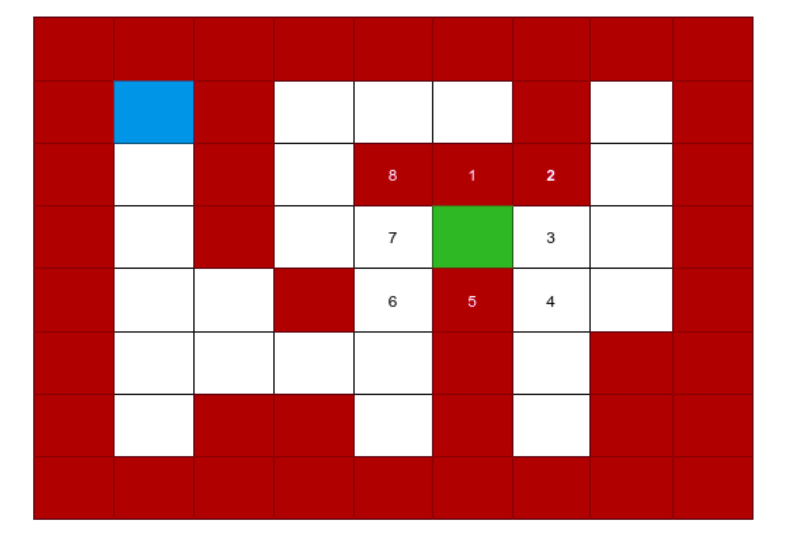

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter1Mapa.png")

Una vez obtenemos todas las casillas adyacentes a la casilla origen iremos iterando sobre la lista llamando a la función **exploracion**

In [ ]:
def exploracion(mapa, casilla, destino, nodoBest, lInterior, lFrontera):
    coste = 0
    pos = -1
    g = 0
    h = 0
    esta = False

    if mapa.getCelda(casilla.getFila(),casilla.getCol()) != 1:
        for i in lInterior:
            if i.casilla.getFila() == casilla.getFila() and i.casilla.getCol() == casilla.getCol():
                esta = True
            if esta:
                break
        if not esta:
            if casilla.getFila() - 1 == nodoBest.getCasilla().getFila() and casilla.getCol() + 1 == nodoBest.getCasilla().getCol():
                coste = 1.5
            elif casilla.getFila() + 1 == nodoBest.getCasilla().getFila() and casilla.getCol() + 1 == nodoBest.getCasilla().getCol():
                coste = 1.5
            elif casilla.getFila() + 1 == nodoBest.getCasilla().getFila() and casilla.getCol() - 1 == nodoBest.getCasilla().getCol():
                coste = 1.5
            elif casilla.getFila() - 1 == nodoBest.getCasilla().getFila() and casilla.getCol() - 1 == nodoBest.getCasilla().getCol():
                coste = 1.5
            else:
                coste = 1

            g = nodoBest.getG() + coste
            i = 0
            while pos == -1:
                if len(lFrontera) == 0 or i >= len(lFrontera):
                    break
                if lFrontera[i].casilla.getFila() == casilla.getFila() and lFrontera[i].casilla.getCol() == casilla.getCol():
                    pos = i
                i = i + 1

            if pos == -1:
                
                h = manhattan(casilla, destino)
               
                lFrontera.append(Nodo(nodoBest, casilla, g, h))
            else:
                if g < lFrontera[pos].getG():
                    lFrontera[pos].setPadre(nodoBest)
                    lFrontera[pos].setG(g)
                    lFrontera[pos].setF(g + lFrontera[pos].getH())

En esta función es donde evaluaremos si una casilla es valida y el coste de ir a la misma.

En primer lugar, comprobamos si se se puede pasar por la casilla, esta comprobación la hacemos con el siguiente if
> if mapa.getCelda(casilla.getFila(),casilla.getCol()) != 1

Lo que hacemos es situar la casilla en el mapa y si su valor es **distinto** de 1 pasaremos a evaluar el coste de ir a la casilla, si su valor es **igual** 1 no evaluaremos el coste de ir a dichar casilla debido a que es un bloque rojo y no podemos pasar por ahí.

Seguidamente, comprobamos si la casilla está en la **listaInterior** ya que si está, no hay que hacer nada ya que esa casilla está evaluada.

Cuando la casilla no está en **listaInterior**, llegamos a la asignación de costes, es decir lo que cuesta ir desde la casilla origen a sus adyacentes, en este caso hay dos opciones:
- Si el movimiento para llegar de la casilla origen a la que estamos evaluando es **horizontal** o **vertical**, su coste es: **1**

- Si el movimiento para llegar de la casilla origen a la que estamos evaluando es **diagonal**, su coste es: **1,5**

Esta asignación de costes la hacemos con las siguientes líneas de código:




In [ ]:
if casilla.getFila() - 1 == nodoBest.getCasilla().getFila() and casilla.getCol() + 1 == nodoBest.getCasilla().getCol():
                coste = 1.5
elif casilla.getFila() + 1 == nodoBest.getCasilla().getFila() and casilla.getCol() + 1 == nodoBest.getCasilla().getCol():
                coste = 1.5
elif casilla.getFila() + 1 == nodoBest.getCasilla().getFila() and casilla.getCol() - 1 == nodoBest.getCasilla().getCol():
                coste = 1.5
elif casilla.getFila() - 1 == nodoBest.getCasilla().getFila() and casilla.getCol() - 1 == nodoBest.getCasilla().getCol():
                coste = 1.5
else:
                coste = 1


Básicamente compruebo que si el movimiento es diagonal le asigno **1,5** al coste y si es otro movimiento le asigno **1**.

Seguidamente, calculamos el valor de g, lo obtendremos de la suma del coste del valor de g del nodo padre del mejor nodo actual (en este caso es el nodo origen y como no tiene padre el valor es **0**) más el valor de coste.

A continuación, comprobamos si la casilla está en **listaFrontera**, si no está, calcularemos su h:

> h = manhattan(casilla, destino)

Creamos el nodo de esa casilla y lo insertamos en **listaFrontera**.

Si la casilla está en **listaFrontera**, primero comprobamos que la g que hemos calculado es mejor (un valor más pequeño) que la que tenía en **listaFrontera** si se cumple, actualizamos sus valores en **listaFrontera** añadiendo el mejor nodo actual como padre, seteando la g a la previamente calculado y recalculando el valor de f.

Si la g de **listaFrontera** es mejor, no hacemos nada.

Por lo que el resultado de aplicar los algoritmos **adyacentes** y **exploracion** es el siguiente:

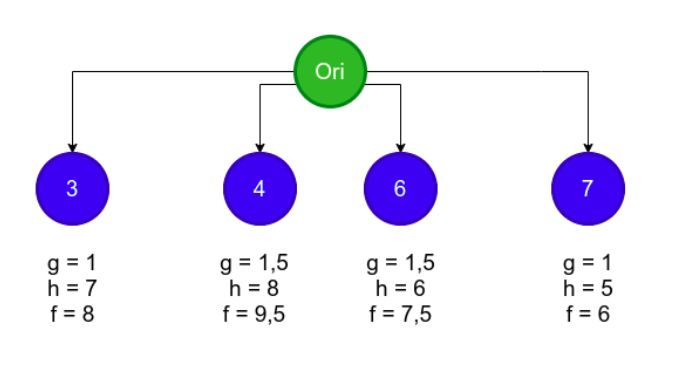

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/arbolIter1.png")

De las 8 casillas que habíamos obtenido de la función **adyacentes** nos hemos quedado con 4 ya que las casillas número: 1,2,5 y 8 son bloques rojos.

Por lo que tras aplicar el algoritmo de **exploracion** hemos creado los nodos: 3, 4, 6 y 7 que son hijos del nodo origen. Recordar que estos nodos ahora están en **listaFrontera**

#### Iteración 2

Una vez la función **exploracion** ha evaluado todas las casillas, obtenemos los siguientes resultados de la primera iteración.



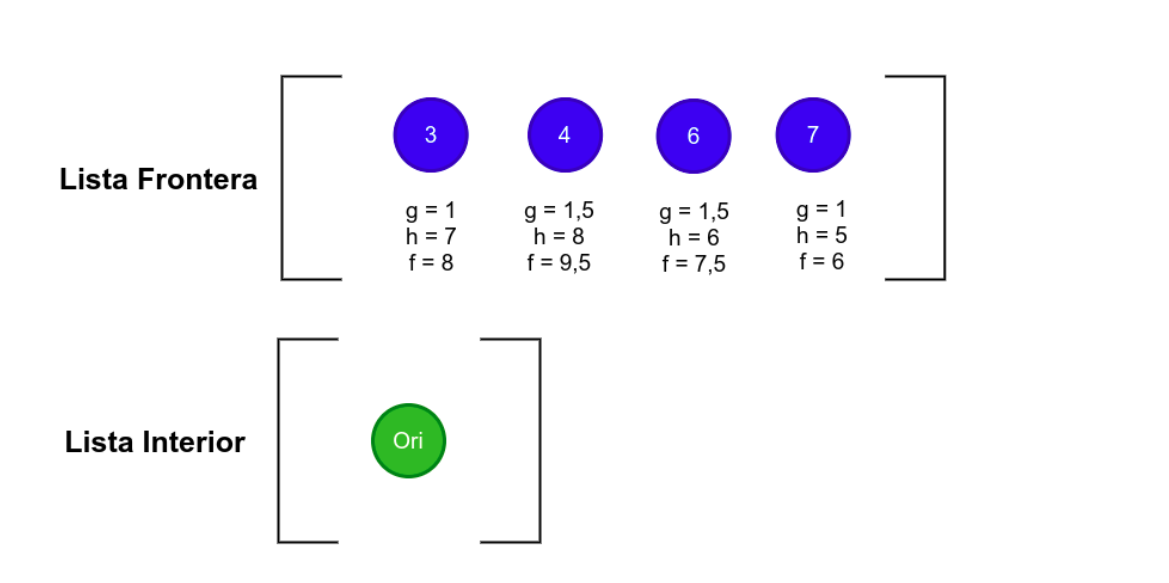

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/listasIt1.png")

En esta segunda iteración vamos a obtener el mejor nodo de lista frontera, para eso aplicamos las siguientes líneas de código.

In [ ]:
 best = lFrontera[0] #Nodo con el que comprobaremos

        for i in lFrontera:
            if i.getF() < best.getF():
                best = i

Empezamos a comprobar con el nodo 3, su f = 8 y tendremos que quedarnos con el que menor f tenga de **listaFrontera**, el cual será el nodo 7. le asignamos el valor de mejor nodo para esta iteración, lo borramos de **listaFrontera** y lo añadimos a **listaInterior**.

Por lo que para esta iteración el mapa queda así:

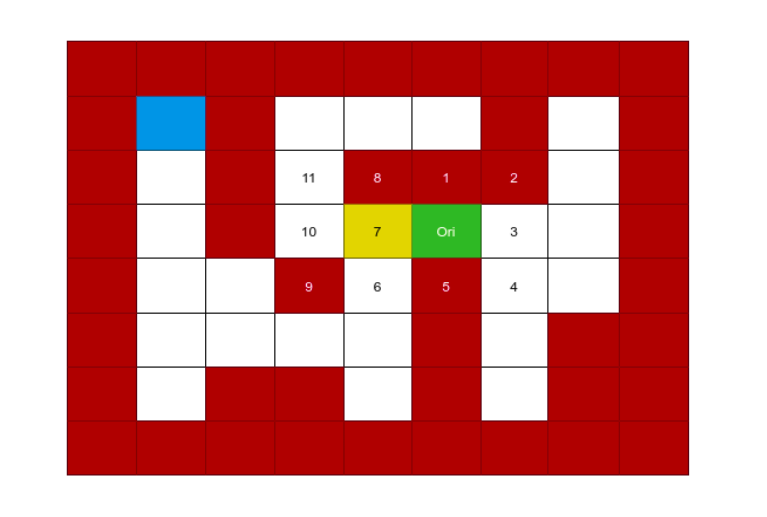

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter2Mapa.png")

**ACLARACIONES**

Pintaré de amarillo las casillas que el algoritmo elija como el mejor nodo para cada iteración y asi saber todo el recorrido que va haciendo.

Los números en la casilla son una manera de poder seguir la traza y ponerle un identificador a cada casilla, durante la explicación iré detallando todo esto de manera que quede lo más claro posible. 

Una vez hechas las comprobaciones de que la casilla 7 no es igual a la casilla destino, volvemos a hacer lo mismo que la iteración anterior.

De la función **adyacentes** obtenemos las siguientes casillas adyacentes a la casilla 7: `8, 1, origen, 5, 6, 9, 10, 11`.

Línea de código donde se llama a la función **adyacentes**

> adya = adyacentes(best.getCasilla())

Seguidamente, sobre las casillas adyacentes iteramos llamando a la función **exploracion**


```
for i in adya:
                exploracion(mapa, i, destino, best, lInterior, lFrontera)
```

Una vez han pasado todas las casillas adyacentes por la función, obtenemos lo siguiente: 


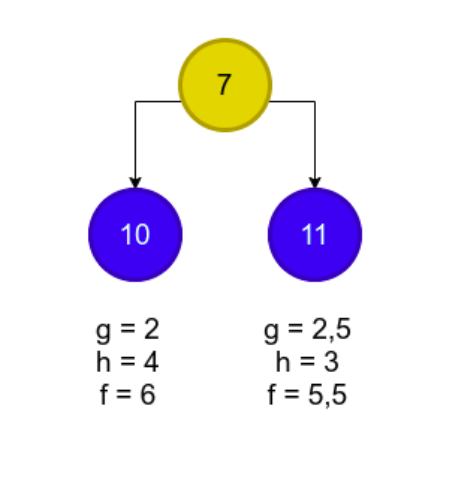

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/arbolIter2.png")

De todos los adyacentes que habíamos conseguido, solo hemos creado los nodos de las casillas 10 y 10. Podemos observar que el valor de g es la suma de la g de su padre (nodo 7 con g = 1) más el coste de ir desde la casilla 7 hasta las casillas 10 (coste = 1) y 11 (coste = 1,5).

Además estos dos nuevos nodos, han sido insertados en **listaFrontera**.



#### Iteración 3

Tras acabar de evaluar todas las casillas con la función de **exploracion**, nuestras listas contienen los siguientes nodos:



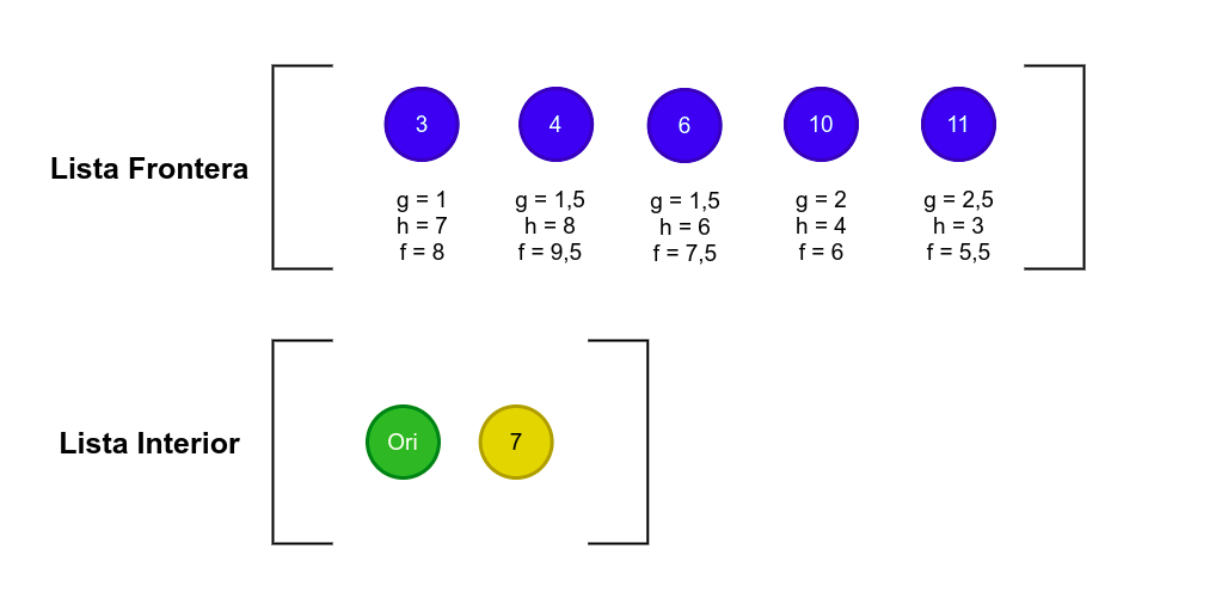

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/listasIt2.png.png")

A continuación, como hicimos en la iteración anterior, vamos a seleccionar el mejor nodo de **listaFrontera**, en este caso el mejor es el nodo 11 ya que su f = 5,5 la menor de todos los nodos. Lo eliminamos de **listaFrontera** y lo añadimos a **listaInterior**.

El mapa queda ahora así:

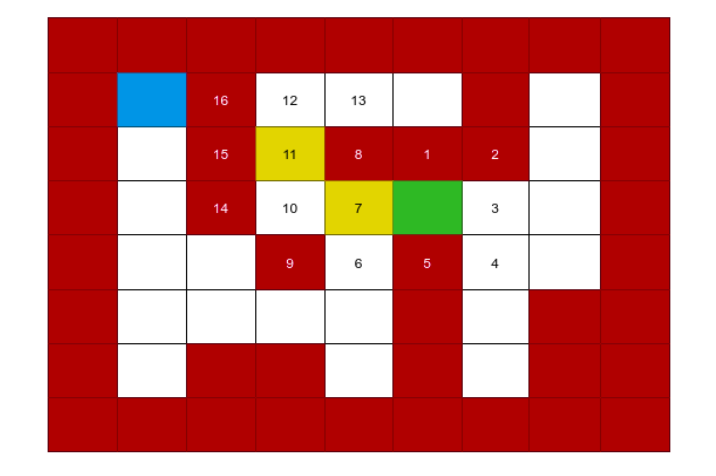

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter3Mapa.png")

A continuación, comprobamos que la casilla 11 no es igual a la casilla destino y volvemos a llamar a la función **adyacentes**

En este caso, las casillas adyacentes que nos devuelve son: `12, 13, 8, 7, 10, 14, 15, 16`.

Seguidamente, teniendo las casillas adyacentes, iteramos sobre ellas llamando a **exploracion**, obteniendo el siguiente resultado:

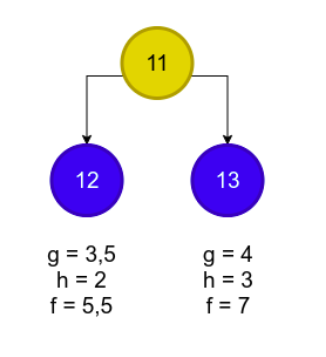

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/arbolIter3.png")

Hemos creado los nodos 12 y 13, los cuales están añadidos a **listaFrontera**.

#### Iteración 4

Tras acabar de evaluar todas las casillas con la función de **exploracion**, nuestras listas contienen los siguientes nodos: 



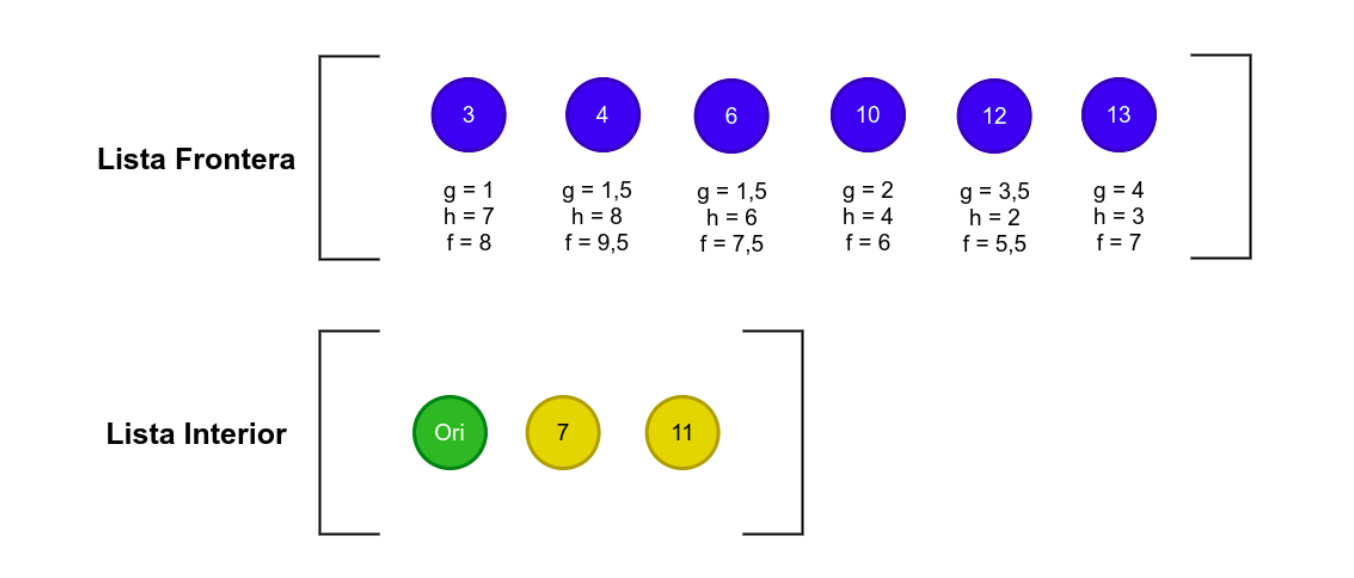

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/listasIt3.png")

A continuación, elegimos el mejor nodo de **listaFrontera** que es el nodo 12. Lo borramos de **listaFrontera** y lo añadimos a **listaInterior**.

El mapa ahora queda así:

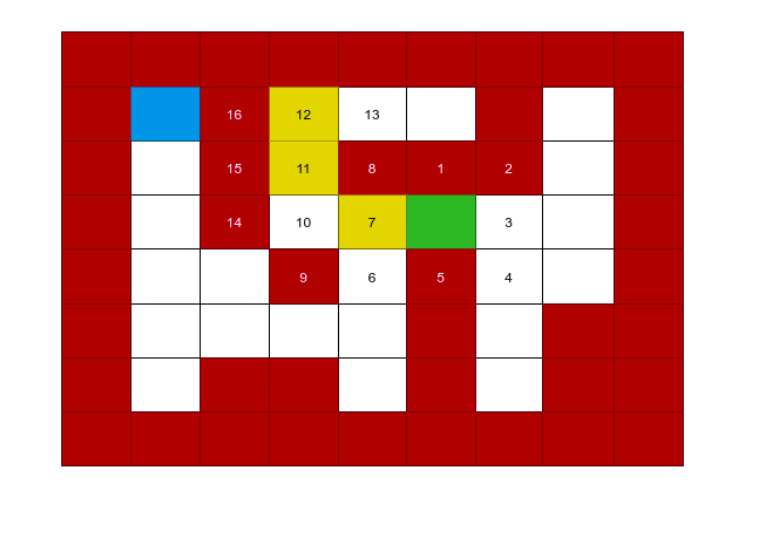

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter4mapa.png")

Tras comprobar que la casilla 12 no es igual a la casilla destino, obtenemos sus adyacentes.



**ACLARACIÓN**

Al hacer la traza del problema no he numerado las casillas que forman parte del límite del mapa para no liar con tanto número, pero mi algoritmo **SI QUE TIENE EN CUENTA ESTAS CASILLAS**.

Las casillas adyacentes son las siguientes: `13, 8, 11, 15, 16` (más las 3 que forman el límite del mapa que **NO LAS HE TENIDO EN CUENTA PARA LA TRAZA**).

Seguidamente, volvemos a iterar sobre las adyacentes y llamando a **exploracion**, el cual **NO** crea ningún nodo nuevo.

#### Iteración 5

Tras acabar de evaluar todas las casillas con la función de **exploracion**, nuestras listas contienen los siguientes nodos:








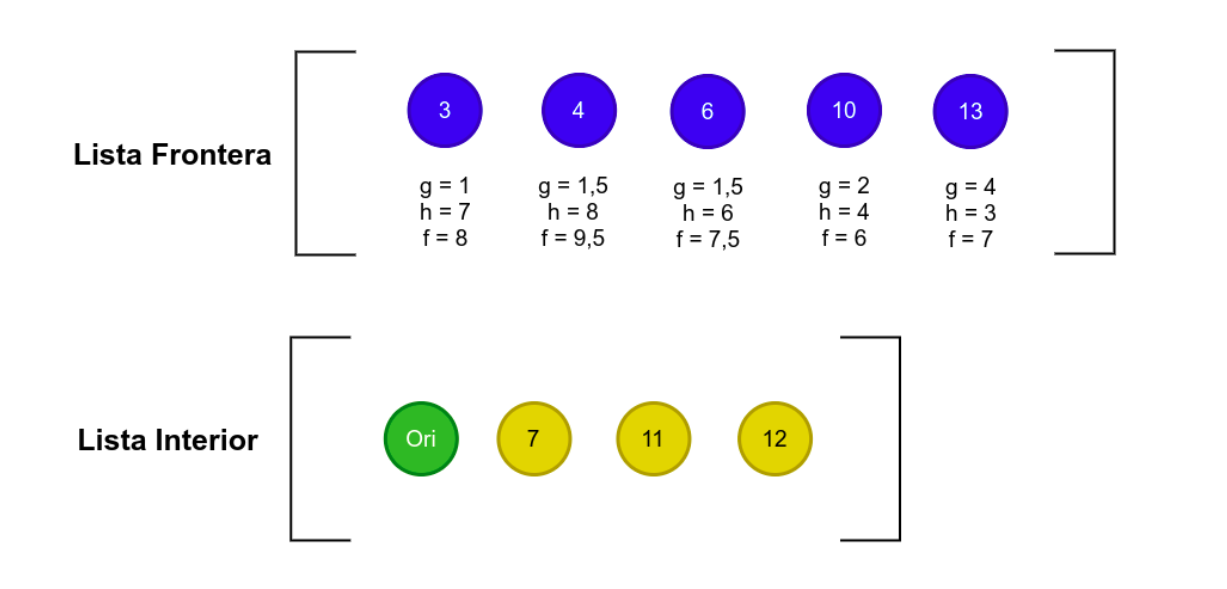

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/listasIt4.png")

A continuación, escogemos el mejor nodo de **listaFrontera**, el cual es el nodo 10, lo borramos de **listaFrontera** y lo añadimos a **listaInterior**.

El mapa queda de la siguiente manera:

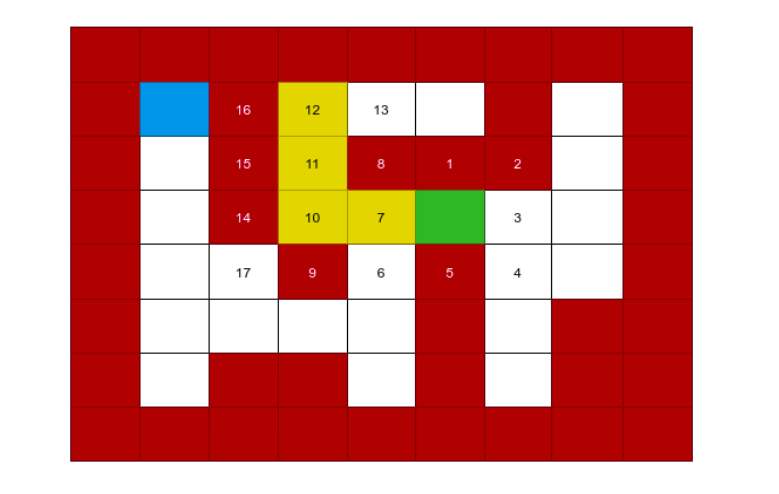

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter5mapa.png")

Comprobamos que la casilla 10 no es igual a la casilla destino y pasamos a obtener sus adyacentes, los cuales son: `11, 8, 7, 6, 9, 17, 14, 15`.

A continuación, llamamos a **exploracion** de la misma manera que en la iteraciones anteriores. Su resultado es el siguiente:



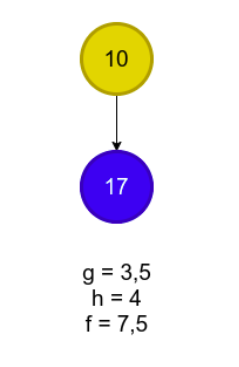

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/arbolIter5.png")

La creación del nodo 17, el cual añadimos a **listaFrontera**

#### Iteración 6


Tras acabar de evaluar todas las casillas con la función de **exploracion**, nuestras listas contienen los siguientes nodos:


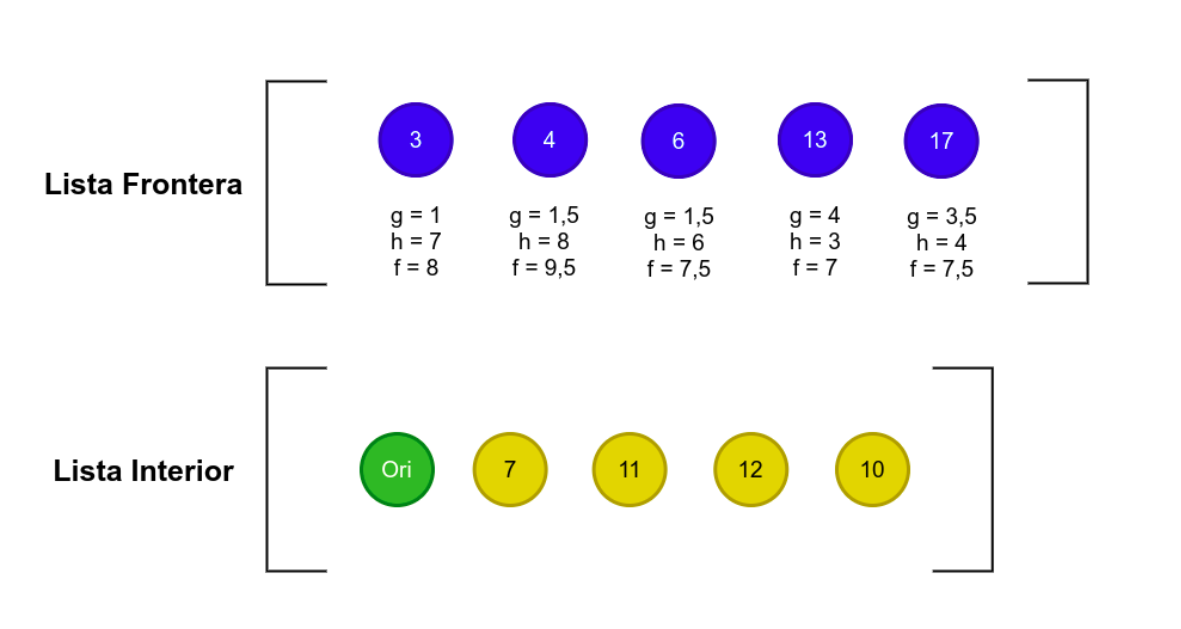

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/listasIt5.png")

Ahora elegimos el nodo que tiene la menor f, en este caso es el nodo 13, lo borramos de **listaFrontera** y lo añadimos a **listaInterior**

El mapa queda de esta manera: 

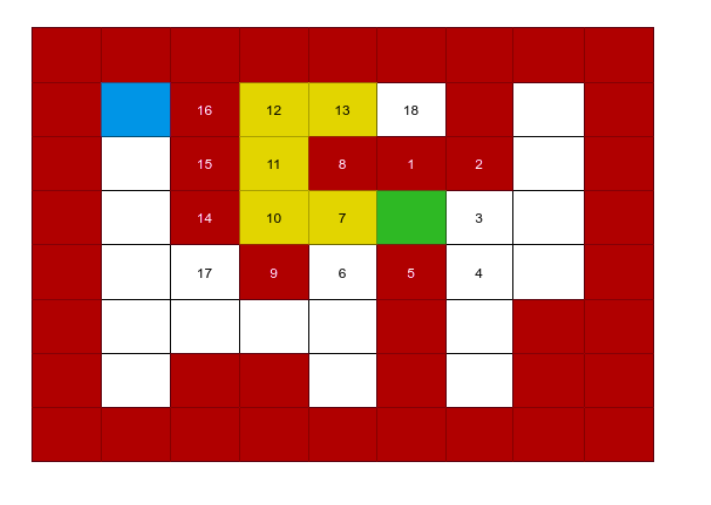

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter6mapa.png")

Comprobamos que la casilla 13 no es igual a la casilla destino y obtenemos los adyacentes, los cuales son: `18, 1, 8, 11, 12 (más las 3 casillas de arriba que marcan el límite del mapa)`

Aplicamos la función **exploracion** de la misma manera que siempre y obtenemos el siguiente resultado: 

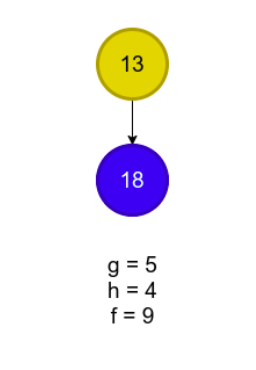

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/arbolIter6.png")

La creación del nodo 18, el cual añadimos a **listaFrontera**

#### Iteración 7

Tras acabar de evaluar todas las casillas con la función de **exploracion**, nuestras listas contienen los siguientes nodos:



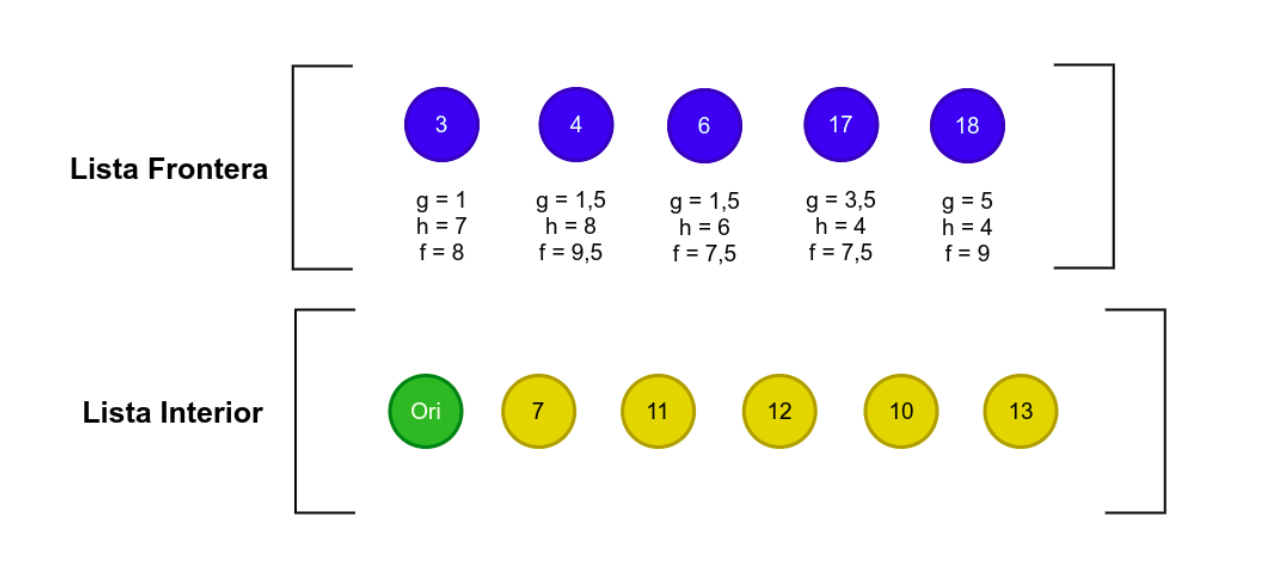

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/listasIt6.png")

En esta iteración tenemos un caso particular, el valor de f es el mismo en el nodo 6 y en el nodo 17.

¿Con cuál me quedo?

Nos quedaremos con el nodo 6 debido a que en el bucle donde comparo los nodos de **listaFrontera** para asignar el mejor nodo el valor de f tiene que ser **menor** por lo que cuando comparamos el valor de f del nodo 6 con el de nodo 17, **no asignamos** el mejor nodo a 17 ya que es igual y no menor.

Borramos el nodo 6 de **listaFrontera** y lo añadimos a **listaInterior**.

El mapa queda de la siguiente manera:

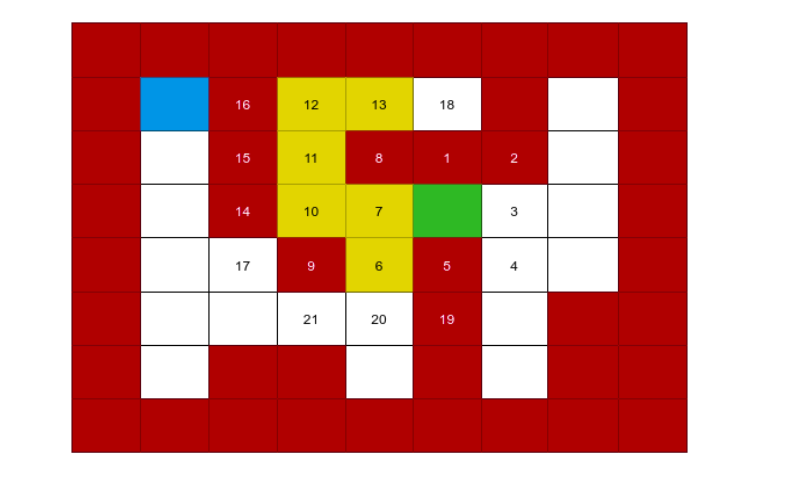

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter7mapa.png")

Una vez comprobado que la casilla 6 no es igual a la casilla destino, obtenemos sus adyacentes: `7, origen, 5, 19, 20, 21, 9, 10`.

Ahora, llamamos a **exploracion** de la misma manera que las iteraciones anteriores, el resultado es el siguiente: 

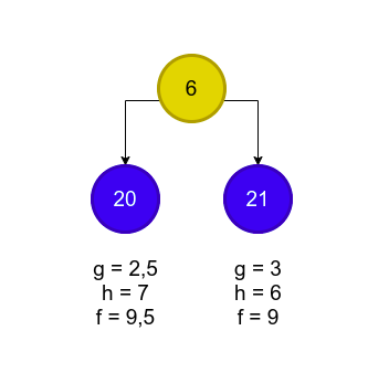

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/arbolIter7.png")

La creación de los nodos 20 y 21, estos nodos han sido añadidos a **listaFrontera**

#### Iteración 8

Tras acabar de evaluar todas las casillas con la función de **exploracion**, nuestras listas contienen los siguientes nodos:



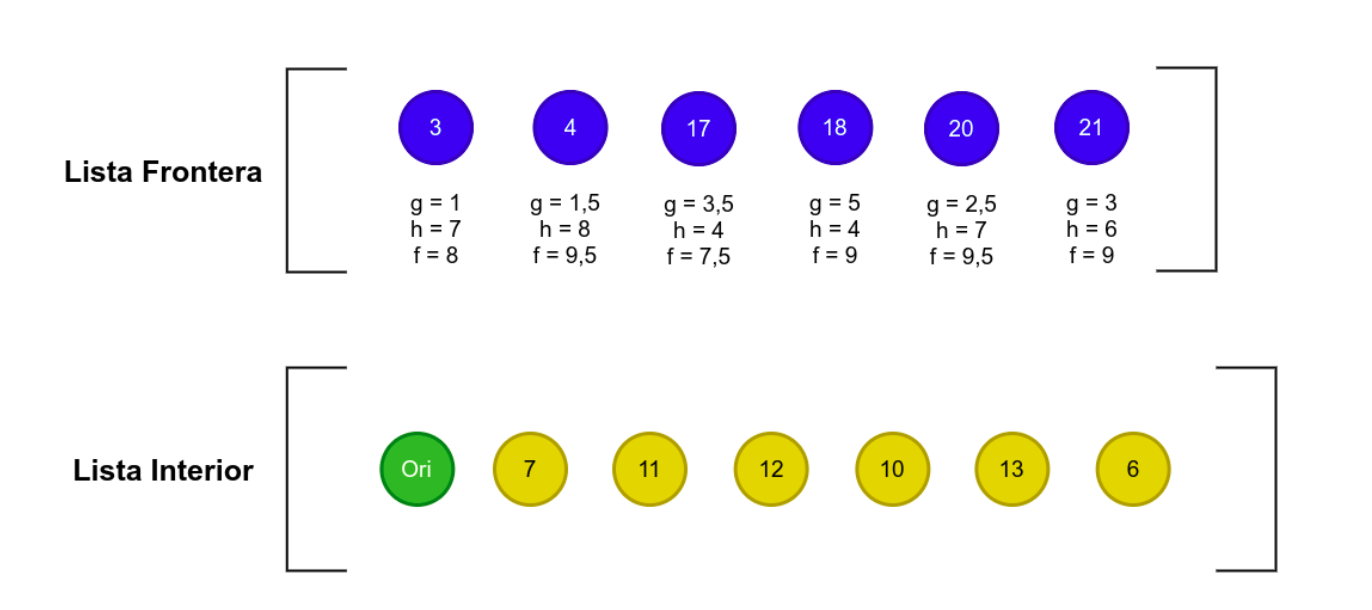

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/listasIt7.png")

A continuación, elegimos el mejor nodo de **listaFrontera** es decir, el que tiene la menor f, en este caso es el nodo 17, lo borramos de **listaFrontera** y lo añadimos a **listaInterior**.

El mapa queda de la siguiente manera: 

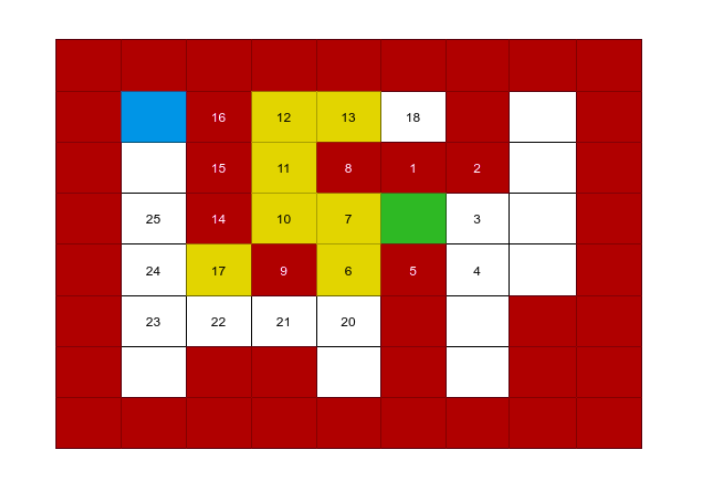

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter8mapa.png")

Tras comprobar que la casilla 17 no es igual a la casilla destino, obtenemos sus adyacentes con la función **adyacentes**, nos devuelve la siguiente lista: `14, 10, 9, 21, 22, 23, 24, 25`.

Sobre ella iteramos y vamos llamando a la función **exploración** para cada casilla, el resultado es el siguiente:

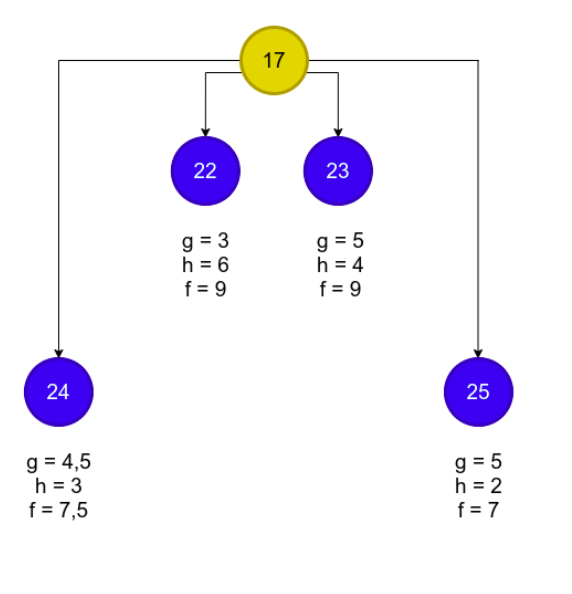

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/arbolIter8.png")

Hemos creado los siguientes nodos, los cuales añadimos a la **listaFrontera**

#### Iteración 9

Tras acabar de evaluar todas las casillas con la función de **exploracion**, nuestras listas contienen los siguientes nodos:



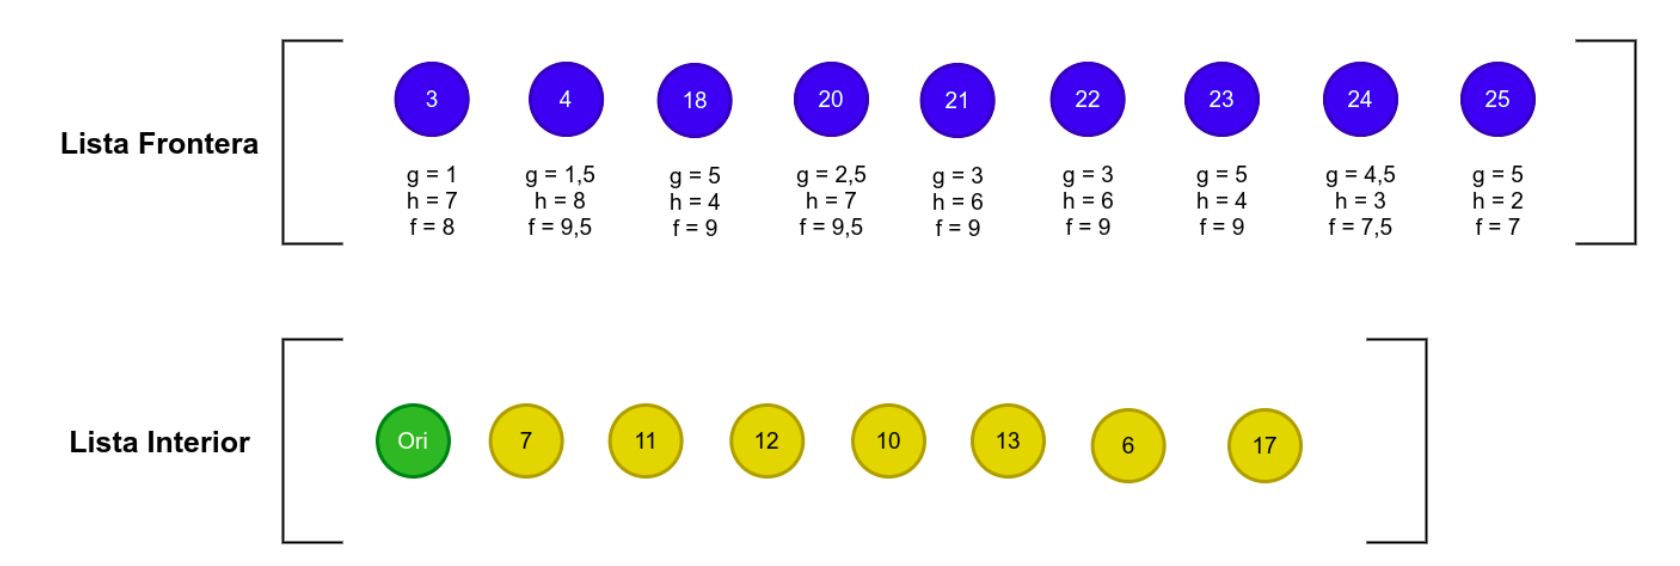

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/listasIt8.png")

Ahora, obtenemos el mejor nodo de **listaFrontera** para esta iteración, el cual es el nodo 25, lo borramos de **listaFrontera** y lo añadimos a **listaInterior**.

El mapa queda de la siguiente manera:

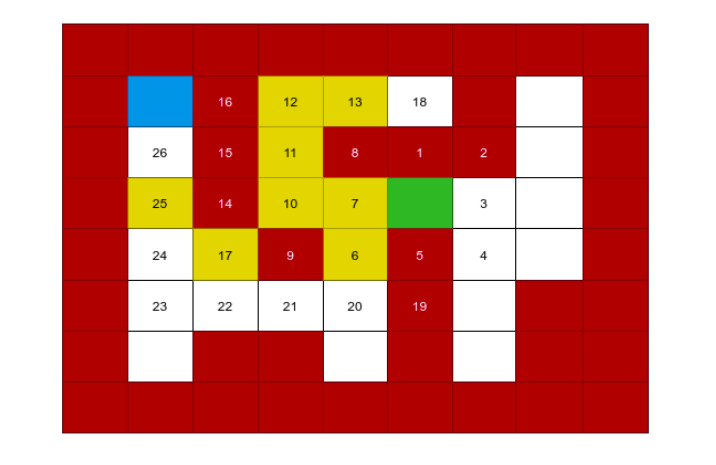

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter9mapa.png")

Tras comprobar que la casilla 25 no es igual a la casilla destino, obtenemos sus adyacentes: `26, 15, 14, 17, 24 (más las tres casilllas rojas que delimitan el mapa)`.

Seguidamente, iteramos sobre los adyacentes llamando a **exploracion** y el resultado es el siguiente:

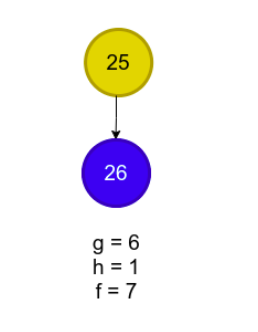

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/arbolIter9.png")

Hemos creado el nodo 26, el cual está añadido a **listaFrontera**

#### Iteración 10

Tras acabar de evaluar todas las casillas con la función de **exploracion**, nuestras listas contienen los siguientes nodos:


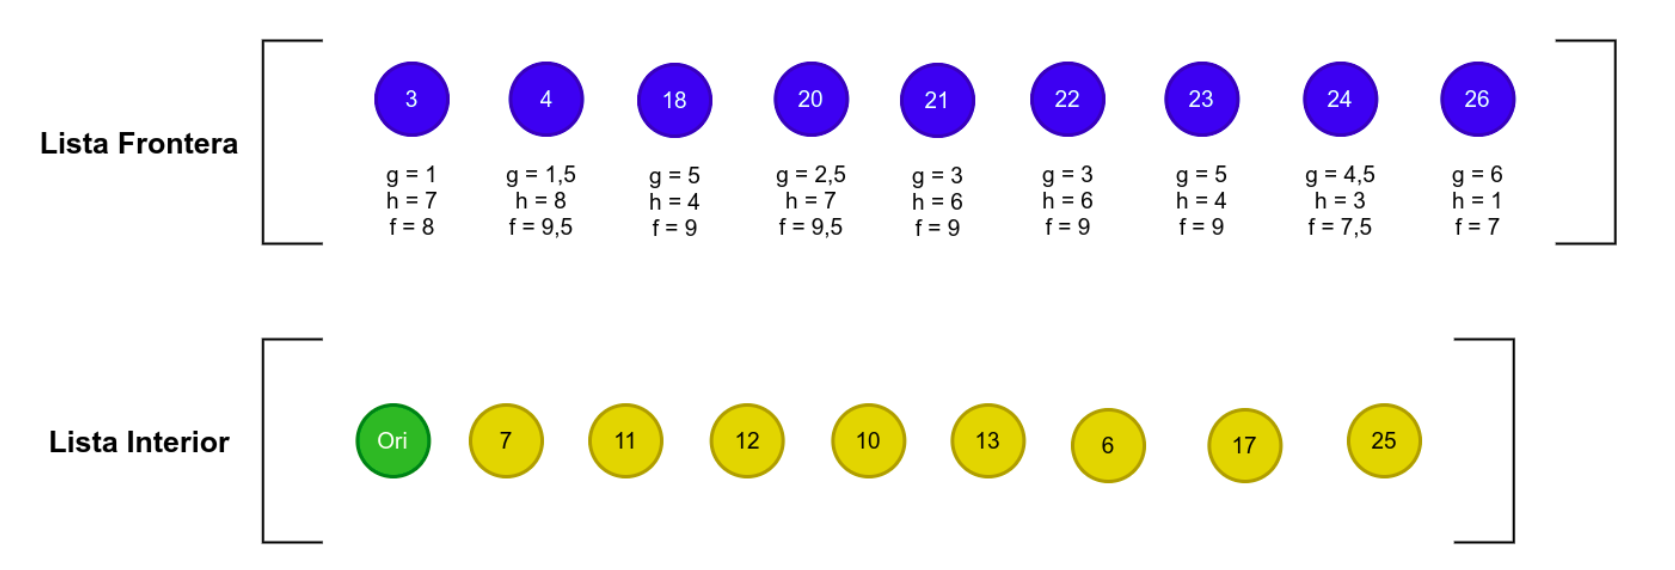

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/listasIt9.png")

Ahora, obtenemos el mejor nodo para esta iteración el cual es el nodo 26, lo borramos de **listaFrontera** y lo añadimos a **listaInterior**.

El mapa queda de la siguiente manera:

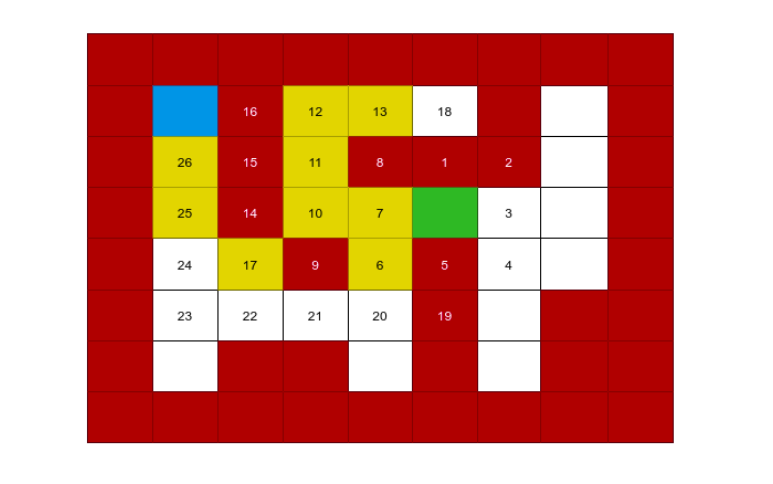

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter10mapa.png")

Tras comprobar que la casilla 26 no es igual a la casilla destino, obtenemos sus adyacentes: `destino, 16, 15, 14, 25 (más las tres casillas que delimitan el mapa)`.

Llamamos a **exploracion** de la misma manera que hemos hecho en las otras iteraciones y el resultado es el siguiente.

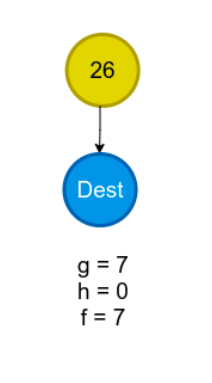

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/correccion.png")

Hemos creado el nodo destino, el cual ya se ha añadido a **listaFrontera**.

####Iteración 11 Final

Tras acabar de evaluar todas las casillas con la función de **exploracion**, nuestras listas contienen los siguientes nodos:


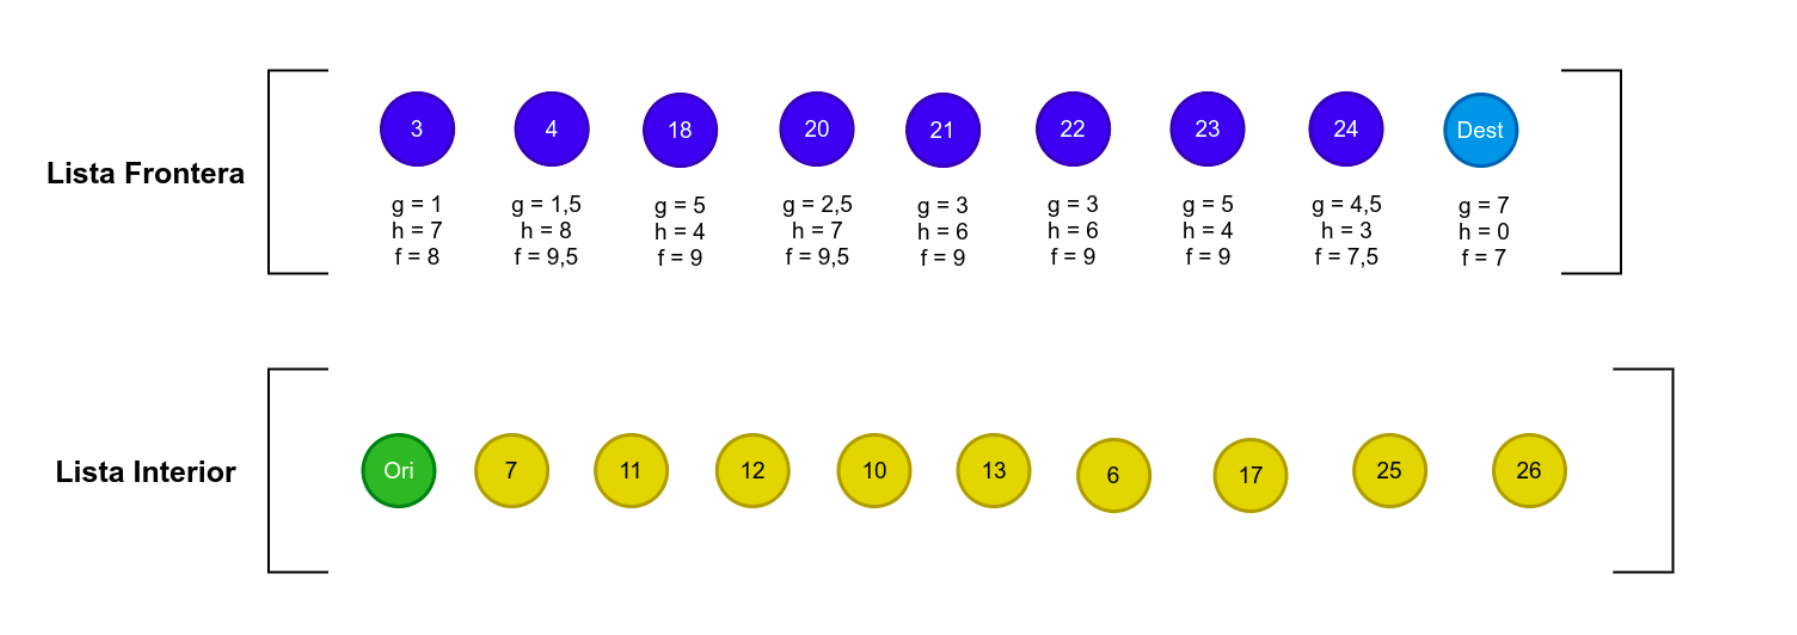

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/listasIt10.png")

Para está iteración el mejor nodo es el final, y al comprobar si su casilla es igual a la casilla destino, entramos en la reeconstrucción del camino que va de origen a destino.

Para empezar, el coste total del camino es la g del nodo destino, eso es lo que retornaremos a `main.py`

Ahora, nos centramos en la reeconstrucción del camino, esta reeconstrucción se hace desde la casilla destino, hasta la casilla origen.

Este camino lo crearemos a partir del mejor nodo de esta iteración el cual es el nodo destino y usaremos el siguiente bucle:


```
            while best != None:
                if best.padre != None:
                    camino[best.getCasilla().getFila()][best.getCasilla().getCol()] = 'X'

                best = best.padre
```

Lo que hace es, mientras el nodo best, no sea null, si su padre no es null, pintaremos en la casilla del nodo best el camino.

Para la siguiente iteración lo que hacemos es coger el padre de nodo best.

Por lo tanto, el camino resultante es el siguiente: `destino, 26, 25, 17, 10, 7, origen`

De una forma más gráfica queda de esta manera:

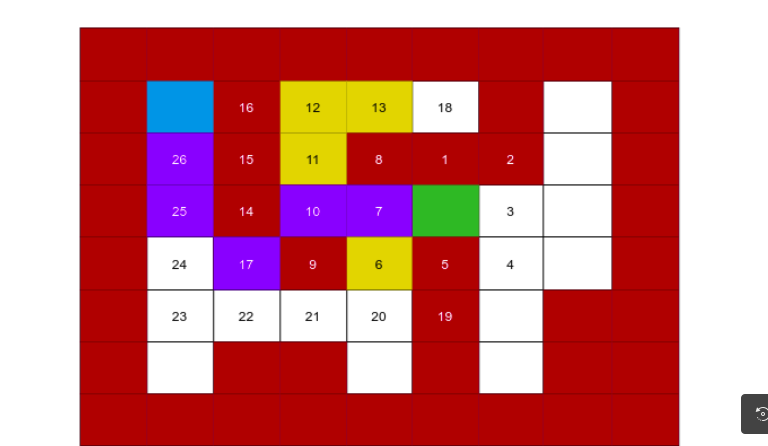

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/iter11mapa.png")

## Implementación de diversas heurísticas

### Manhattan


```
def manhattan(origen, destino):
    return abs(destino.getFila() - origen.getFila()) + abs(destino.getCol() - origen.getCol())
```
Esta heurística puede parecer la mejor, es la que menos nodos expande siempre, pero, según el tipo de mapa, esta heurística puede no ser admisible.


### Euclídea


```
def euclidea(origen, destino):
  return pow(pow(abs(destino.getFila() - origen.getFila()), 2) + pow(abs(destino.getCol() - origen.getCol()), 2), 0.5)
```
Se basa en la distancia euclidiana de dos puntos, se demora un poco más que Manhattan, además, es una heurística que siempre busca la diagonal.


### Chebyshev


```
def chebyshev(origen, destino):
    vector1 = np.array([origen.getFila(), origen.getCol()])
    vector2 = np.array([destino.getFila(), destino.getCol()])

    op2=np.linalg.norm(vector1-vector2,ord=np.inf)
    return op2
```
La distancia de Chebyshev es la distancia máxima a lo largo de un eje. A esta distancia también se le denomina **distancia del tablero de ajedrez** porque representa el número mínimo de movimientos que necesita el rey para moverse entre casillas.




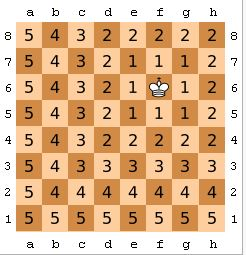

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/distancia_chebyshev_2.jpeg")

### Coseno



```
def coseno(origen, destino):
    vector1 = np.array([origen.getFila(), origen.getCol()])
    vector2 = np.array([destino.getFila(), destino.getCol()])

    op7 = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * (np.linalg.norm(vector2)))

    return op7
```

Para usar esta heurística, debemos de pasar las coordenadas que vayamos a tratar a vector.

Su funcionamiento es el siguiente, cuando evaluamos la casilla origen o la casilla que estemos trando en la iteración i, compararemos el ángulo que forma con la casilla destino, cuando el resultado se aproxime más a 1, significará que estaremos más cerca de formar un ángulo de 0º.

Cuando el resultado es 1, formamos un ángulo de 0º y quiere decir que estamos en la misma posición que la casilla destino.



## Mapas y Comparación de nodos explorados

A continuación, voy a adjuntar los mapas que he usado en esta práctica junto con los gráficos de los nodos explorados por cada heurística. La heurística que se usa es **Manhattan**, esto es importante para ya que se puede ver los costes y se comentará más adelante en las conclusiones.

### Mapa 1

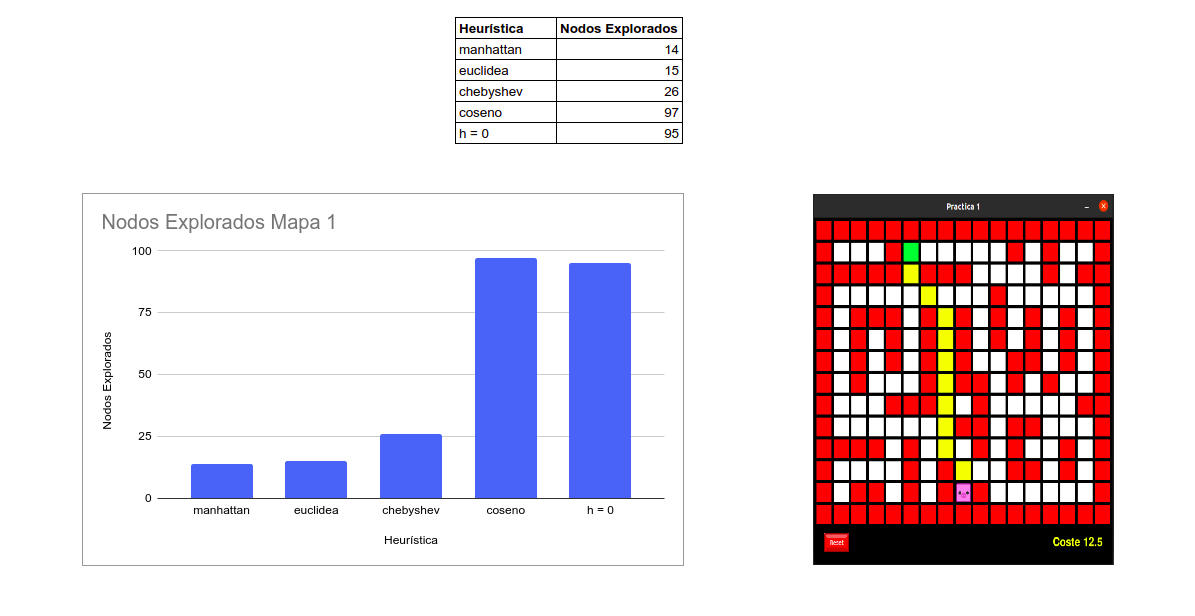

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/mapa1Informe.png")

### Mapa 2

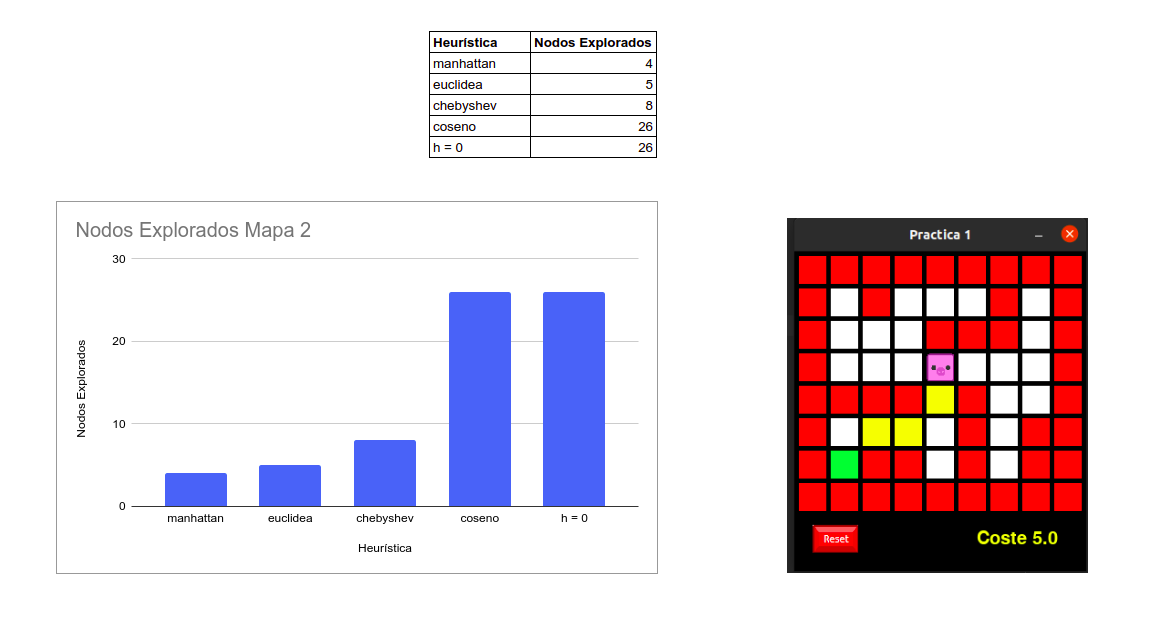

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/mapa2Informe.png")

### Mapa 3

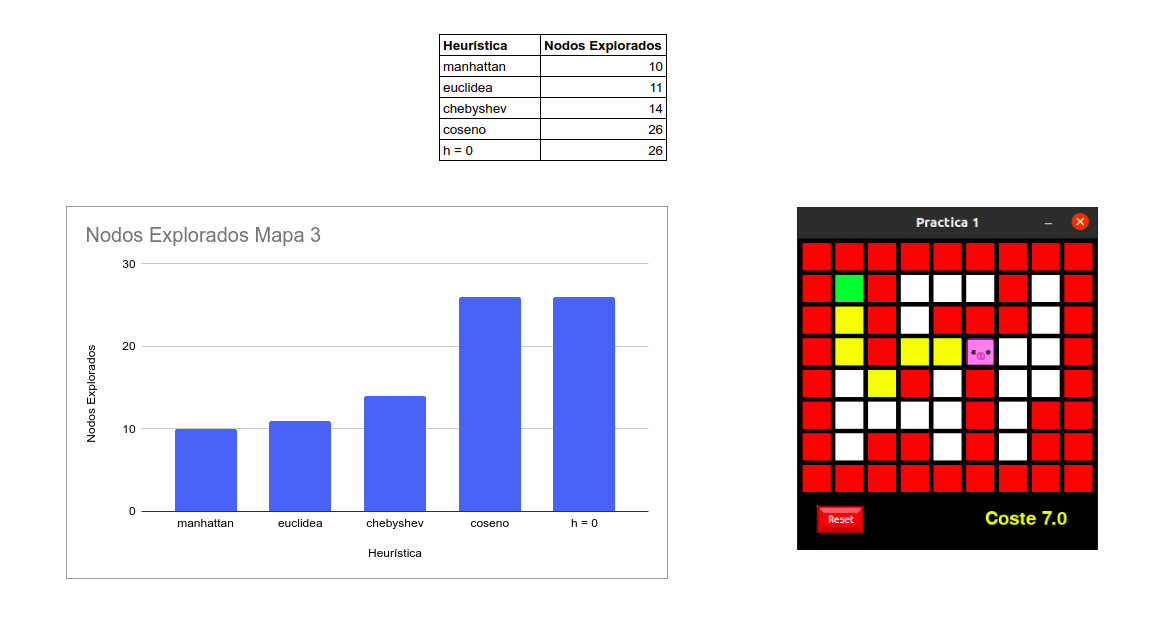

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/mapa3Informe.png")

### Mapa 4

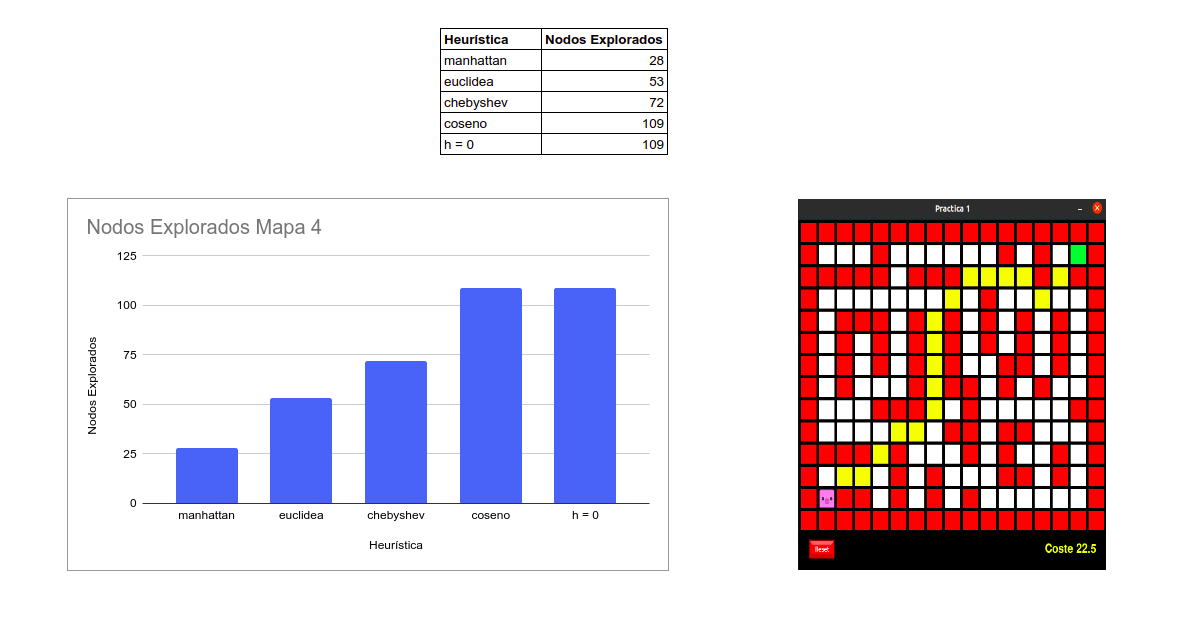

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/mapa4Informe.png")

### Mapa 5

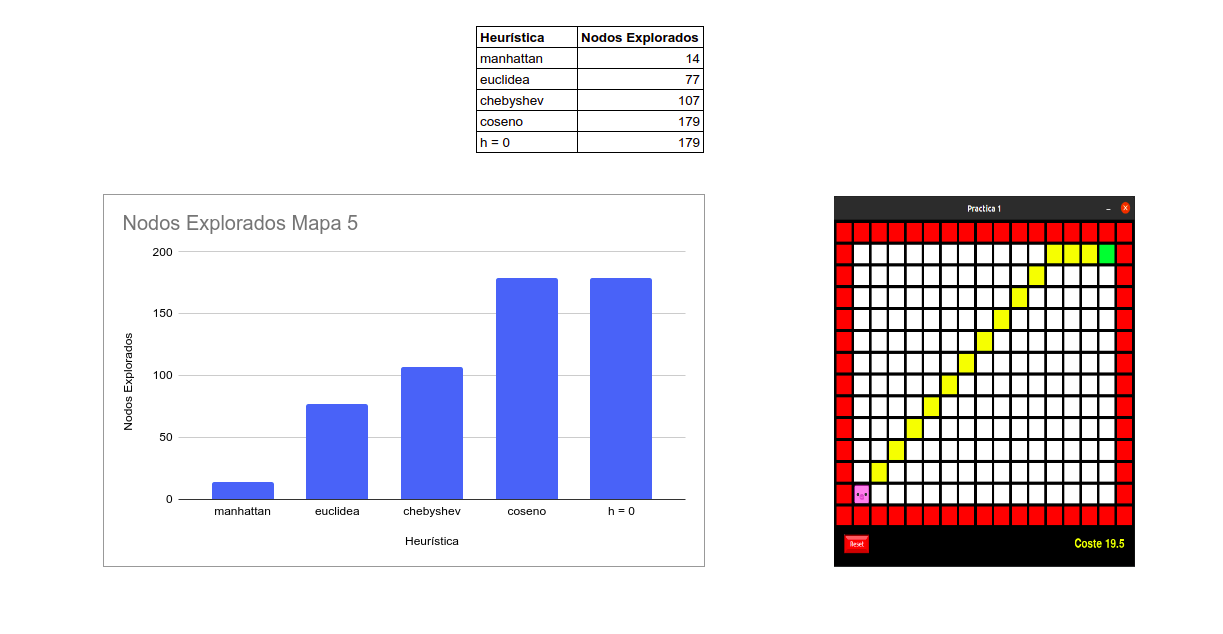

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/mapa5Informe.png")

### Mapa 6

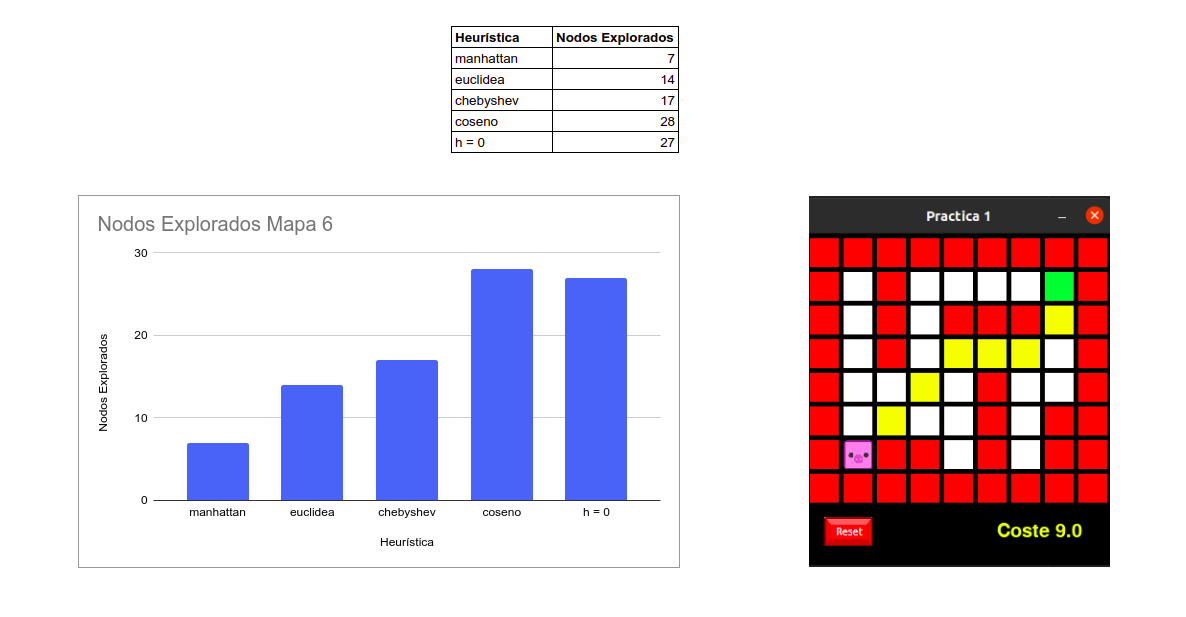

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/mapa6Informe.png")

### Mapa 7

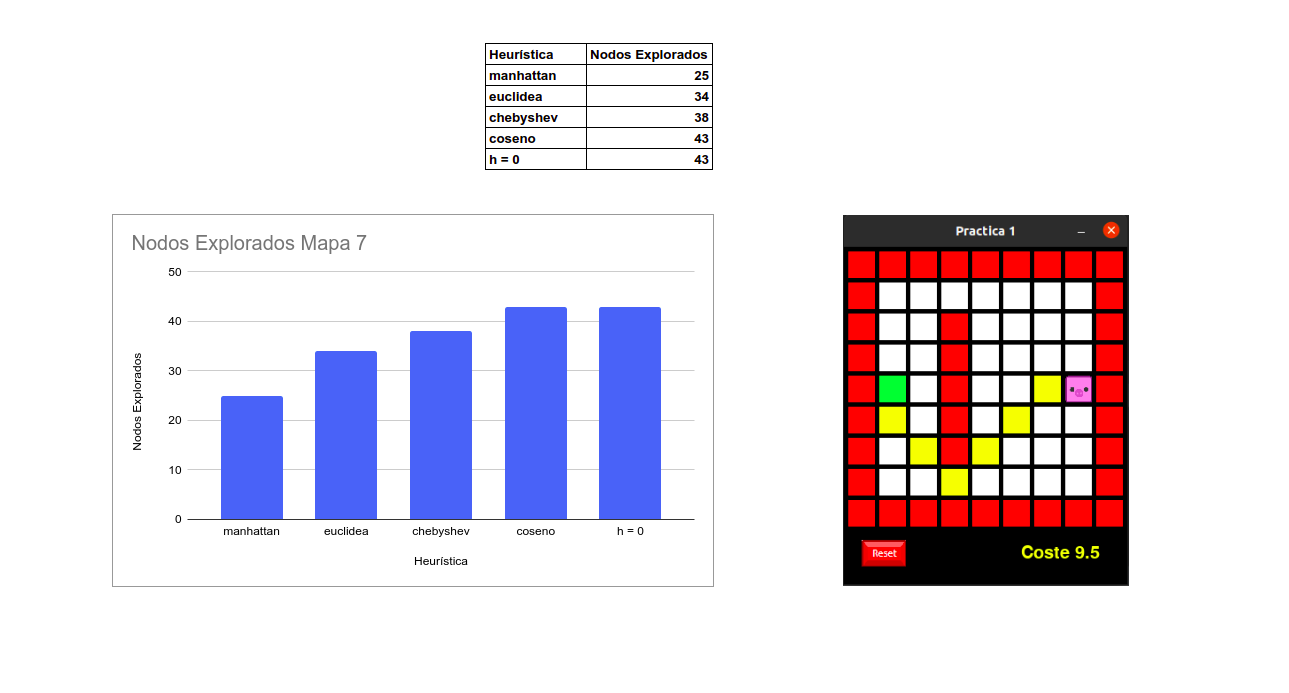

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/mapa7Informe.png")

### Mapa 8

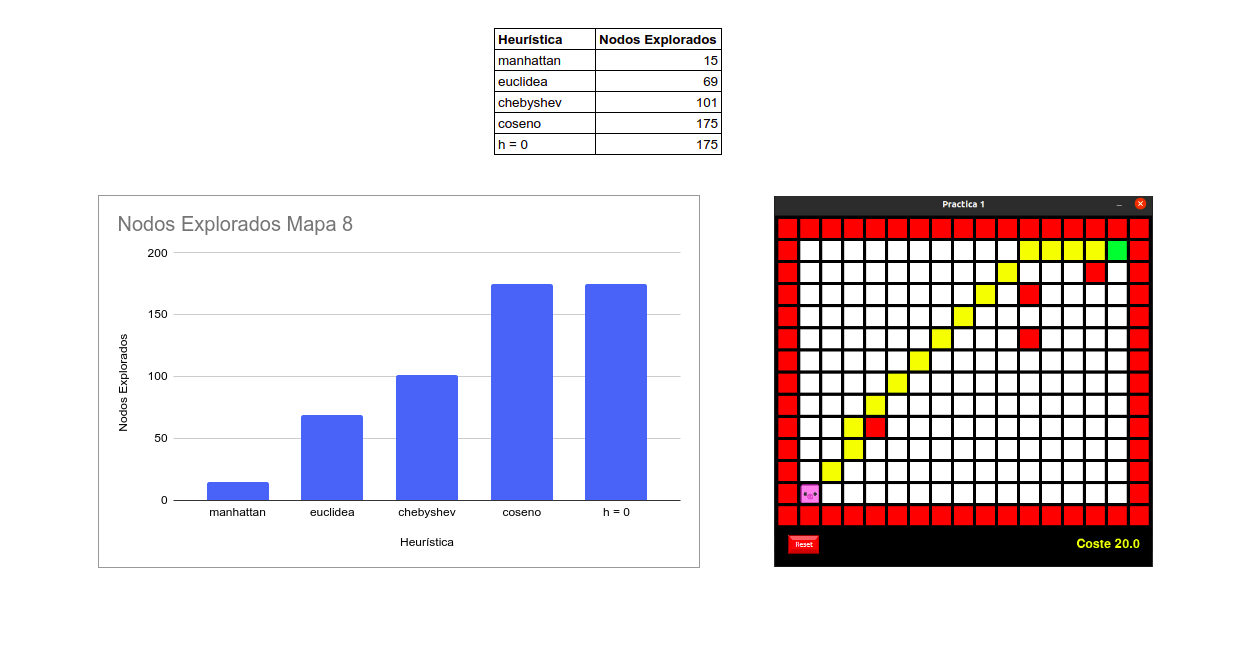

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/mapa8Informe.png")

### Conclusiones

La heurística del coseno siempre esta muy a la par con h = 0, esto se debe a que va comparando el coseno de cada casilla y hasta que no es igual que el coseno de la casilla destino, va expandiendo y comparando todas las casillas que puede.

Después, tenemos las heurísticas de Chebyshev y la Euclídea que expanden menos nodos pero no como lo hace Manhattan, sin embargo, hay un problema, Manhattan no es una heurística admisible.



#### Heurística admisible

Para saber si una heurística es admisible la comparo con h = 0, ya que nos fijamos únicamente con la g, el valor de la heurística que comparo tiene que ser **menor** o **igual** que el valor de h = 0.

En el mapa 8, el coste de Manhattan es de 20, sin embargo, el coste con h = 0, es 19.5, por lo que es mayor que el coste mínimo real (h* (n)).

Adjunto imagen del mapa 8 con h = 0.

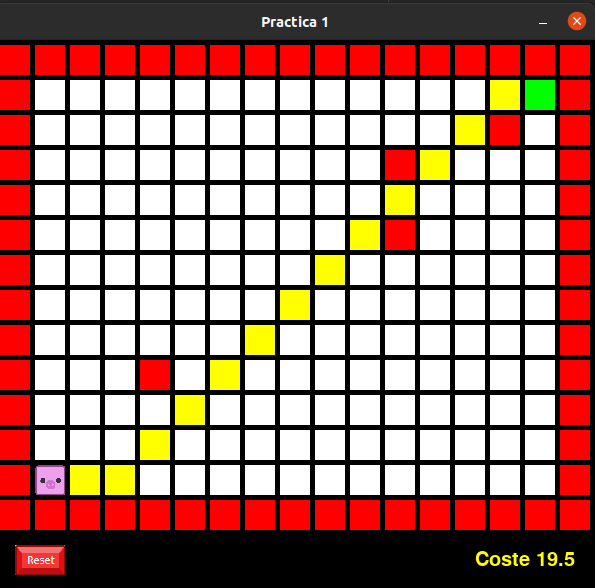

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/documentación SI/Mapa8H0.png")


Por esta razón, no podemos escoger Manhattan como mejor heurística para todos los mapas que planteo en la práctica, por lo que, la mejor heurística, la que menos nodos expande después de Manhattan es, **EUCLÍDEA**.

### Bibliografía

https://ichi.pro/es/9-medidas-de-distancia-en-ciencia-de-datos-159983401462266

https://programmerclick.com/article/87201087090/

https://programmerclick.com/article/57371190890/

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('DocumentaciónPrac1.ipynb')
